In [2]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data

In [4]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
print('train images:',mnist.train.images.shape,'labels:',mnist.train.labels.shape)
print('validation images:',mnist.validation.images.shape,'labels:',mnist.validation.labels.shape)
print('test images:',mnist.test.images.shape,'labels:',mnist.test.labels.shape)

train images: (55000, 784) labels: (55000, 10)
validation images: (5000, 784) labels: (5000, 10)
test images: (10000, 784) labels: (10000, 10)


In [6]:
def layer(output_dim,input_dim,inputs,activation=None):
    W = tf.Variable(tf.random_normal([input_dim,output_dim]))
    b = tf.Variable(tf.random_normal([1,output_dim]))
    XWb = tf.matmul(inputs,W) +b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

In [7]:
x = tf.placeholder("float", [None,784])

In [8]:
h=layer(output_dim=1000,input_dim=784,inputs=x,activation=tf.nn.relu)

In [9]:
h1=layer(output_dim=1000,input_dim=1000,inputs=h,activation=tf.nn.relu)

In [10]:
y_predict=layer(output_dim=10,input_dim=1000,inputs=h1,activation=None)

In [11]:
y_label = tf.placeholder("float", [None,10])

In [12]:
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predict,labels=y_label))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [13]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)\
                    .minimize(loss_function)

In [14]:
correct_prediction = tf.equal(tf.argmax(y_label,1),tf.argmax(y_predict,1))

In [15]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))

In [20]:
trainEpochs = 15
batchSize = 100
totalBatchs=int(mnist.train.num_examples/batchSize)
loss_list=[];epoch_list=[];accuracy_list=[]
from time import time
startTime=time()

sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [21]:
for epoch in range(trainEpochs):
    for i in range(totalBatchs):
        batch_x,batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer,feed_dict={x:batch_x,y_label:batch_y})
    loss,acc = sess.run([loss_function,accuracy],feed_dict={x:mnist.validation.images,y_label:mnist.validation.labels})
    epoch_list.append(epoch);
    loss_list.append(loss)
    accuracy_list.append(acc)
    print("Train Epoch:",'%02d' %(epoch+1),"Loss=",\
         "{:.9f}".format(loss),"Accuracy=",acc)
duration = time()-startTime
print("Train Finished takes:",duration)

Train Epoch: 01 Loss= 151.976821899 Accuracy= 0.904
Train Epoch: 02 Loss= 98.396446228 Accuracy= 0.9324
Train Epoch: 03 Loss= 95.885978699 Accuracy= 0.9332
Train Epoch: 04 Loss= 65.075653076 Accuracy= 0.9498
Train Epoch: 05 Loss= 61.255210876 Accuracy= 0.9514
Train Epoch: 06 Loss= 56.619781494 Accuracy= 0.954
Train Epoch: 07 Loss= 55.443775177 Accuracy= 0.9564
Train Epoch: 08 Loss= 57.036556244 Accuracy= 0.9548
Train Epoch: 09 Loss= 58.476451874 Accuracy= 0.9564
Train Epoch: 10 Loss= 50.481403351 Accuracy= 0.9626
Train Epoch: 11 Loss= 52.144748688 Accuracy= 0.9604
Train Epoch: 12 Loss= 52.788433075 Accuracy= 0.9598
Train Epoch: 13 Loss= 49.031826019 Accuracy= 0.9636
Train Epoch: 14 Loss= 50.048316956 Accuracy= 0.9682
Train Epoch: 15 Loss= 50.647998810 Accuracy= 0.965
Train Finished takes: 241.18498730659485


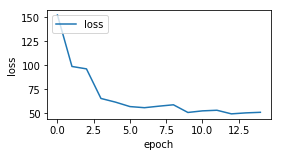

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list,loss_list,label = 'loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'],loc='upper left')

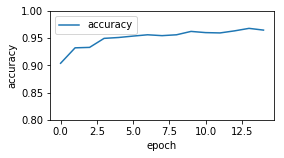

In [23]:
plt.plot(epoch_list,accuracy_list,label="accuracy")
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.ylim(0.8,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [24]:
print("Accuracy:",sess.run(accuracy,feed_dict={x:mnist.test.images,y_label:mnist.test.labels}))

Accuracy: 0.9633


In [25]:
prediction_result=sess.run(tf.argmax(y_predict,1),feed_dict={x:mnist.test.images})

In [26]:
prediction_result[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 4, 9], dtype=int64)

In [29]:
import matplotlib.pyplot as plt
import numpy as np
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        
        ax.imshow(np.reshape(images[idx],(28,28)), cmap='binary')
        
        title="label=" +str(np.argmax(labels[idx]))
        if len(prediction)>0:
            title+=",predict=" +str(prediction[idx])
            
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

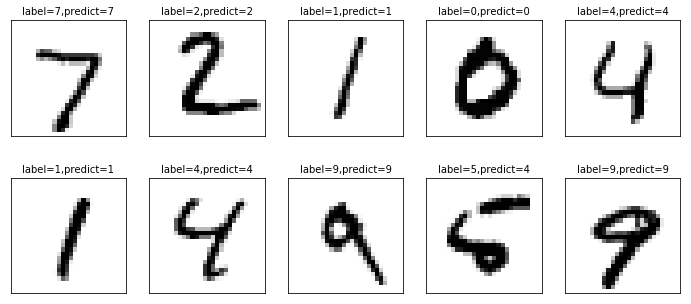

In [30]:
plot_images_labels_prediction(mnist.test.images,mnist.test.labels,prediction_result,0)